<a href="https://colab.research.google.com/github/Sudhangsahu2234/Email-Fraud-Detection/blob/main/Single_Drug_Side_Effect_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Loading and preparing the dataset ---


/tmp/ipython-input-1020728992.py:33: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('medicine_dataset.csv')


Dataset processed into 326650 drug-side effect pairs.
The most common side effect is 'Nausea'. This will be our prediction target.

Created a modeling dataset with 44455 unique drugs.
Number of drugs causing 'Nausea': 29647
---------------------------------------------

--- Encoding features and splitting data ---


/tmp/ipython-input-1020728992.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['Chemical Class'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1020728992.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Data split into 35564 training samples and 8891 testing samples.
---------------------------------------------

--- Training a Logistic Regression model to predict 'Nausea' ---
Model training complete.
---------------------------------------------

--- Evaluating model performance ---
✅ Model Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      2962
           1       0.88      0.93      0.90      5929

    accuracy                           0.87      8891
   macro avg       0.86      0.84      0.85      8891
weighted avg       0.87      0.87      0.87      8891


--- Generating and saving graphs ---
Saved 'top_10_side_effects.png'
Saved 'confusion_matrix.png'
---------------------------------------------


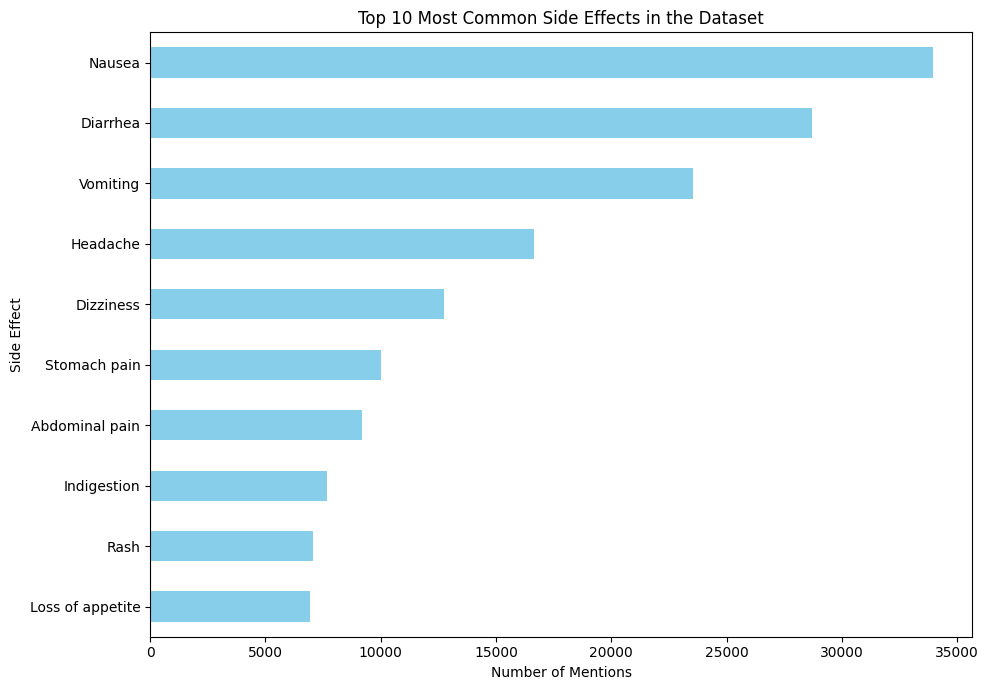

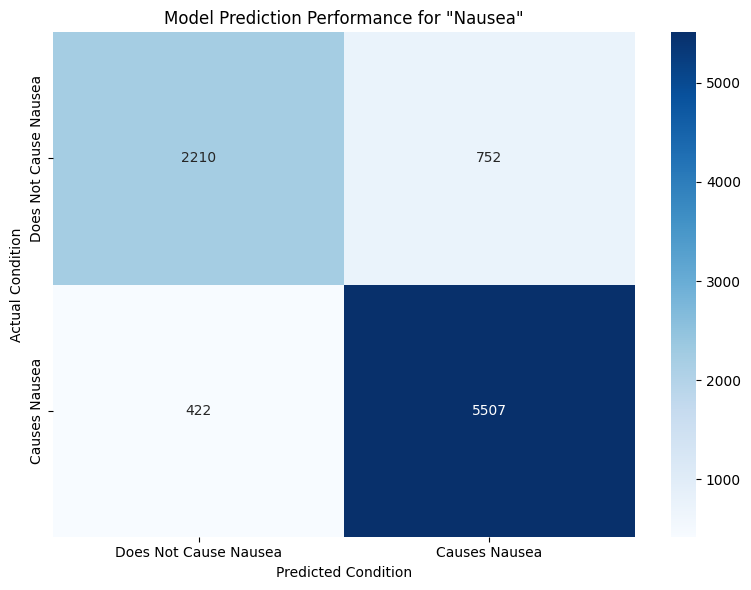

In [ ]:

import subprocess
import sys
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    print("Installing required packages: pandas, scikit-learn, matplotlib, seaborn...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "scikit-learn", "matplotlib", "seaborn", "--quiet"])
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.preprocessing import OneHotEncoder
    print("Packages installed successfully.")


# Step 1: Load and Prepare the Data

print("\n--- Loading and preparing the dataset ---")
df = pd.read_csv('medicine_dataset.csv')


side_effect_cols = [f'sideEffect{i}' for i in range(42)]
feature_cols = ['name', 'Chemical Class', 'Therapeutic Class']
df_subset = df[feature_cols + side_effect_cols]


df_melted = df_subset.melt(
    id_vars=feature_cols,
    value_vars=side_effect_cols,
    var_name='side_effect_source',
    value_name='side_effect'
)


df_melted.dropna(subset=['side_effect'], inplace=True)
df_melted['side_effect'] = df_melted['side_effect'].str.strip()

print(f"Dataset processed into {len(df_melted)} drug-side effect pairs.")

# Step 2: Identify Target and Prepare for Modeling


top_side_effects = df_melted['side_effect'].value_counts()
TARGET_SIDE_EFFECT = top_side_effects.index[0]
print(f"The most common side effect is '{TARGET_SIDE_EFFECT}'. This will be our prediction target.")


df_model = df[['name', 'Chemical Class', 'Therapeutic Class']].drop_duplicates().copy()


drugs_with_target = df_melted[df_melted['side_effect'] == TARGET_SIDE_EFFECT]['name'].unique()
df_model['has_target_side_effect'] = df_model['name'].isin(drugs_with_target).astype(int)


df_model['Chemical Class'].fillna('Unknown', inplace=True)
df_model['Therapeutic Class'].fillna('Unknown', inplace=True)

print(f"\nCreated a modeling dataset with {len(df_model)} unique drugs.")
print(f"Number of drugs causing '{TARGET_SIDE_EFFECT}': {df_model['has_target_side_effect'].sum()}")
print("-" * 45)


# Step 3: Feature Engineering and Data Splitting

print("\n--- Encoding features and splitting data ---")

X_categorical = df_model[['Chemical Class', 'Therapeutic Class']]
y = df_model['has_target_side_effect']


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X_categorical)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")
print("-" * 45)


# Step 4: Train a Simple Model

print(f"\n--- Training a Logistic Regression model to predict '{TARGET_SIDE_EFFECT}' ---")
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
print("Model training complete.")
print("-" * 45)



# Step 5: Evaluate the Mode

print("\n--- Evaluating model performance ---")

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


# Step 6: Create and Save Graphs

print("\n--- Generating and saving graphs ---")

plt.figure(figsize=(10, 7))
top_side_effects.head(10).sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Side Effects in the Dataset')
plt.xlabel('Number of Mentions')
plt.ylabel('Side Effect')
plt.tight_layout()
plt.savefig('top_10_side_effects.png')
print("Saved 'top_10_side_effects.png'")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Does Not Cause Nausea', 'Causes Nausea'],
            yticklabels=['Does Not Cause Nausea', 'Causes Nausea'])
plt.title(f'Model Prediction Performance for "{TARGET_SIDE_EFFECT}"')
plt.ylabel('Actual Condition')
plt.xlabel('Predicted Condition')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("Saved 'confusion_matrix.png'")
print("-" * 45)